In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Reading csv file
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

# Data Preprocessing, Check for null values and replace accordingly with shape of the data 
num_zeros = (data == 0).sum()
print("%-28s%s" % ("Variable", "Number of 0 values"))
print("%-28s%s" % ("--------", "------------------"))
print(num_zeros)

# It makes sense to have 0 pregnancies, but it doesn't make physiological sense to have 
# 0 as a value for the measure of glucose, blood pressure, skin thickness, insulin, and BMI. 
print()

# Replace 0 values in the specified columns to NaN for a better mean prediction
replace_zero_nan = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[replace_zero_nan] = data[replace_zero_nan].replace(0, np.nan)

# This is to see the number of samples before outlier removal
print("Shape BEFORE removing outliers")
print("------------------------------")
print(data.shape)

print()

column_to_interpolate = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Pregnancies", "DiabetesPedigreeFunction"]

# Here, we are iterating through each of the columns and removing any samples that have outliers in any of these columns 
for label in column_to_interpolate:
    
    shapiro_test = stats.shapiro(data[label].dropna())
    print(label)
    print(f"BEFORE outlier removal Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    
    mean = data[label].mean()
    std_dev = data[label].std()

    # Define threshold for outliers 
    threshold = 3 * std_dev

    # Identify rows where values exceed the threshold in the specific column
    outliers_mask = abs(data[label] - mean) > threshold

    # Remove the rows with outliers
    data = data[~outliers_mask]
    
    shapiro_test = stats.shapiro(data[label].dropna())
    print(f"AFTER outlier removal Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    print()
    
# This is to see the number of samples after outlier removal
print("Shape AFTER removing outliers")
print("------------------------------")
print(data.shape)

print()

# As we can see, we still have our NaN data, which we will then impute using KNNImputer in the next code block
print(data)

Variable                    Number of 0 values
--------                    ------------------
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Shape BEFORE removing outliers
------------------------------
(768, 9)

Glucose
BEFORE outlier removal Shapiro-Wilk Test p-value: 1.7201559621149443e-11
AFTER outlier removal Shapiro-Wilk Test p-value: 1.7201559621149443e-11

BloodPressure
BEFORE outlier removal Shapiro-Wilk Test p-value: 9.450984362047166e-05
AFTER outlier removal Shapiro-Wilk Test p-value: 0.03328743204474449

SkinThickness
BEFORE outlier removal Shapiro-Wilk Test p-value: 1.724584142159813e-09
AFTER outlier removal Shapiro-Wilk Test p-value: 0.0026128520257771015

Insulin
BEFORE outlier removal Shapiro-Wilk Test p-value: 2.0556

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    313.2  33.6   
1            1.0     85.0           66.0           29.0     65.2  26.6   
2            8.0    183.0           64.0           28.8    186.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            5.0    116.0           74.0           23.0    116.6  25.6   
..           ...      ...            ...            ...      ...   ...   
726         10.0    101.0           76.0           48.0    180.0  32.9   
727          2.0    122.0           70.0           27.0    128.2  36.8   
728          5.0    121.0           72.0           23.0    112.0  26.2   
729          1.0    126.0           60.0           26.0    172.6  30.1   
730          1.0     93.0           70.0           31.0     69.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


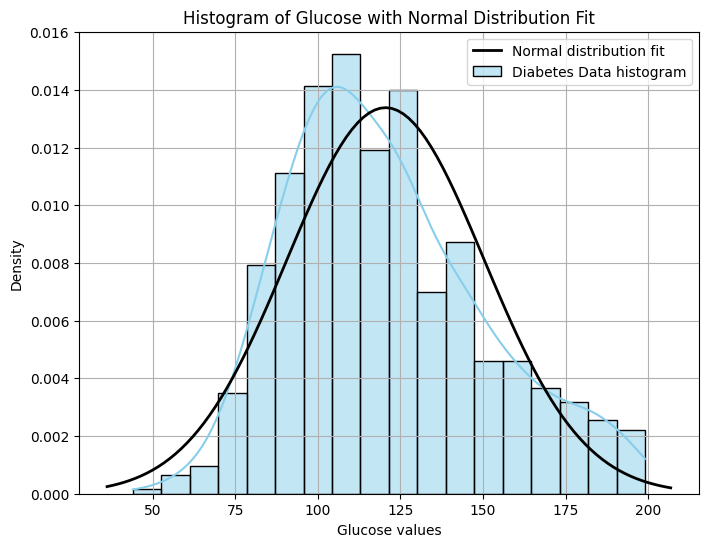

Shapiro-Wilk Test p-value: 0.017764735966920853


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


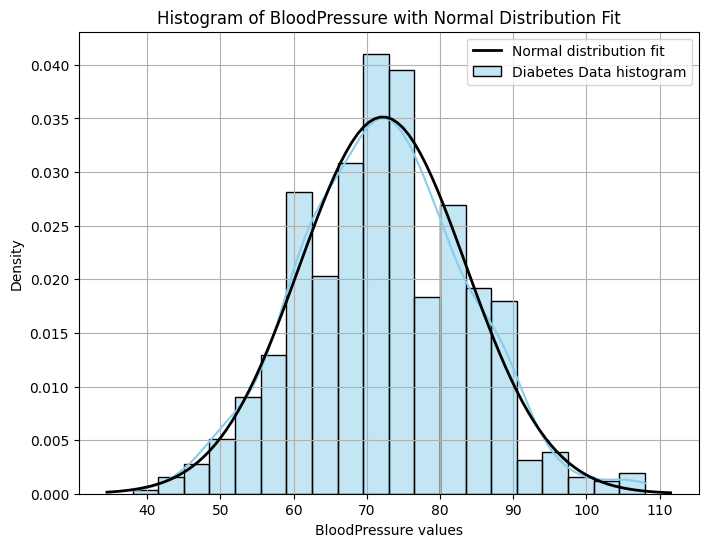

Shapiro-Wilk Test p-value: 0.02460392750799656


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


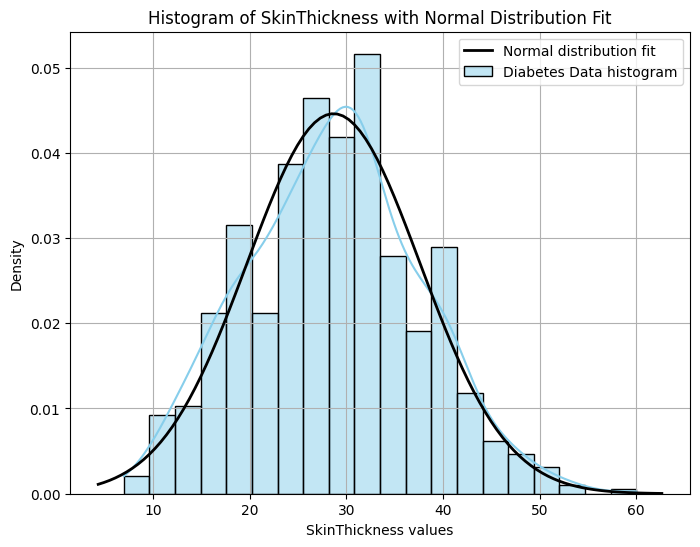

Shapiro-Wilk Test p-value: 2.3815505246133754e-21


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


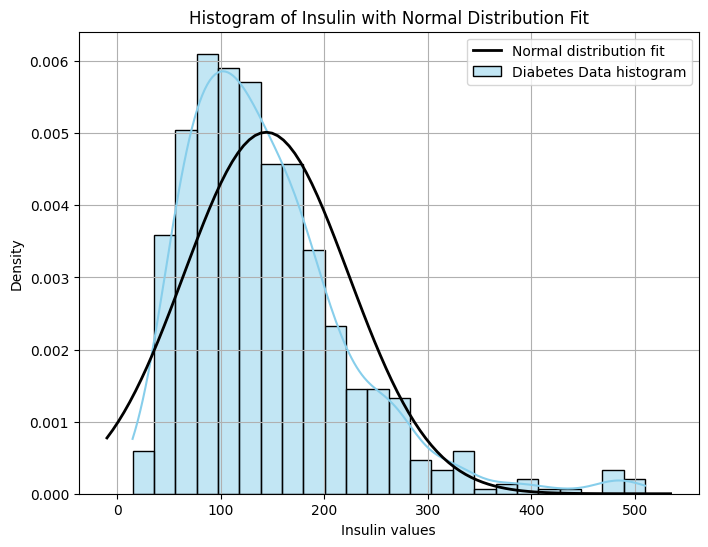

Shapiro-Wilk Test p-value: 5.421810783445835e-05


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


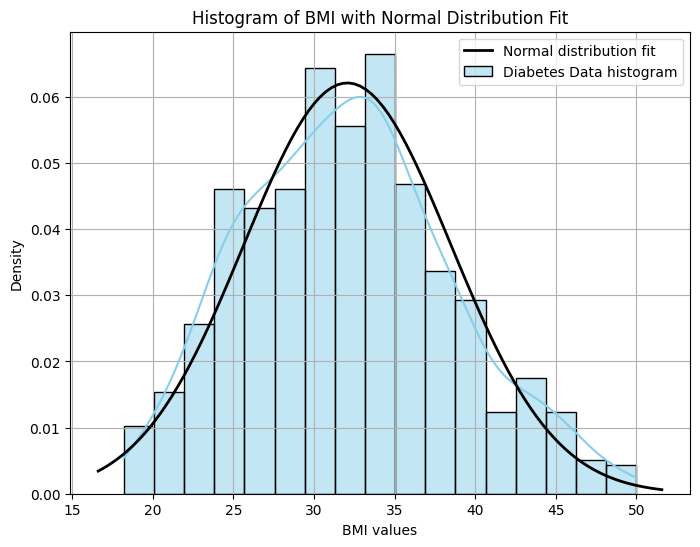

Shapiro-Wilk Test p-value: 1.6365454995457677e-20


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


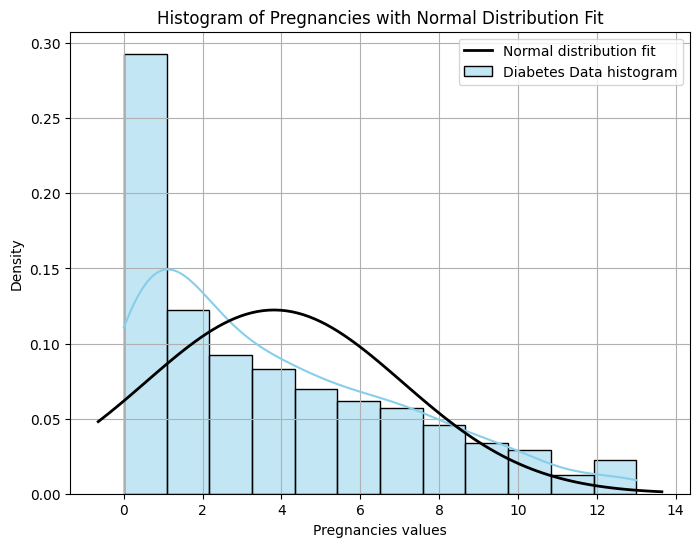

Shapiro-Wilk Test p-value: 9.65208097388753e-22


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


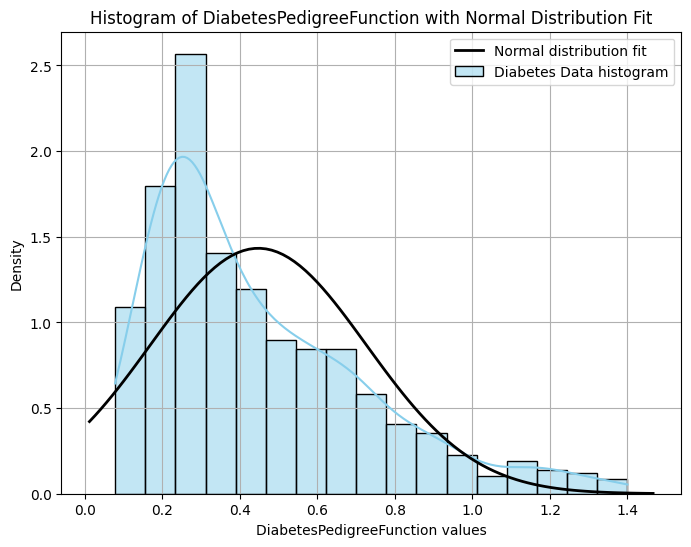

In [2]:
scaler = StandardScaler()
column_names = data.columns

# If we have a scaler, then we will normalize our data using the StandardScaler.
if scaler:  
    data = pd.DataFrame(scaler.fit_transform(data), columns = column_names)


# Here we are imputing our NaN data using the KNNImputer
imputer = KNNImputer(n_neighbors = 5)
data = pd.DataFrame(imputer.fit_transform(data), columns = column_names)

# If we have a scaler, we will invert our data back into it's original un-normalized form 
if scaler:
    data = pd.DataFrame(scaler.inverse_transform(data), columns = column_names)
    
print(data)


#This prints the correlation coeffecient that each variable has with the target, which is the diabetes diagnosis
print("%-25s  %s" % ("Variable", "Correlation to Target"))
print("%-25s  %s" % ("--------", "---------------------"))
for i in range(data.shape[1] - 1):
    label = data.columns[i]
    correlation = np.corrcoef(data[label], data["Outcome"])[0, 1]
    print("%-25s  %f" % (label, correlation))


# Plotting Histograms of each column of the data to see the shape of the data and assess its normality
for i in (column_to_interpolate):
    column_data = data[i]  # Replace 'A' with your column name
    # D'Agostino's K^2 Test
    
    shapiro_test = stats.shapiro(column_data)
    print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

    # Plot histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(column_data, kde=True, stat='density', color='skyblue', label='Diabetes Data histogram')

    # Overlay normal distribution curve
    mu, std = norm.fit(column_data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal distribution fit')

    plt.title(f'Histogram of {i} with Normal Distribution Fit')
    plt.xlabel(f'{i} values')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()